# IMPORTING NECESSARY PACKAGES

In [1]:
# Importing all relevant packages to the project

import warnings  # Import warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Importing ensemble models
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split # importing the train_test_split
from imblearn.over_sampling import SMOTE # importing SMOTE for balancing test set
from sklearn.linear_model import LogisticRegression # importing the Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # import Evaluation Metrics
from sklearn.model_selection import RandomizedSearchCV # importing RandomizedSearchCV
from scipy.stats import loguniform # importing loguniform
from sklearn.model_selection import StratifiedKFold # importing StratifiedKFold for cross-validation
from sklearn.model_selection import GridSearchCV # importing GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score # importing roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve # importing precision_recall_curve

%matplotlib inline

In [2]:
# Loarding the dataset
df = pd.read_csv('Datasets/Breast_Cancer_Wisconsin_Diagnostic.csv')

pd.set_option('display.max_columns', None)

In [3]:
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [4]:
df.rename(columns={'Diagnosis' : 'diagnosis'}, inplace=True)

In [5]:
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


# Exploratory Data Analysis

In [6]:
def Explore_dataset(df):
    print("1. Dataset Dimensions:", df.shape)
    print("\n2. Column Names:\n", df.columns.tolist())
    print("\n3. Summary Info:")
    df.info()
    print("\n4. Missing Values per Column:\n", df.isna().sum())
    print("\n5. Duplicate Rows:", df.duplicated().sum())
    print("\n6. Duplicate Columns:", df.T.duplicated().sum())
    print("\n7. Summary Statistics:\n", df.describe())

    # Detect Outliers
    outlier_counts = {
        col: len(df[(df[col] < df[col].quantile(0.10) - 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10))) |
                    (df[col] > df[col].quantile(0.90) + 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10)))])
        for col in df.select_dtypes(include='number').columns
    }
    print("\n8. Outlier Counts:\n", outlier_counts)


Explore_dataset(df)


1. Dataset Dimensions: (569, 31)

2. Column Names:
 ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'diagnosis']

3. Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-

observation shows that each features in the dataset except the diagnosis has mean, standard error and worst or maximum value recorded as 1, 2, and 3 respectively. e.g radius1, radius2, and radius3

In [7]:
# Summary statistics of the features
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# VISUALIZING DISTRIBUTION AND RELATIONSHIPS

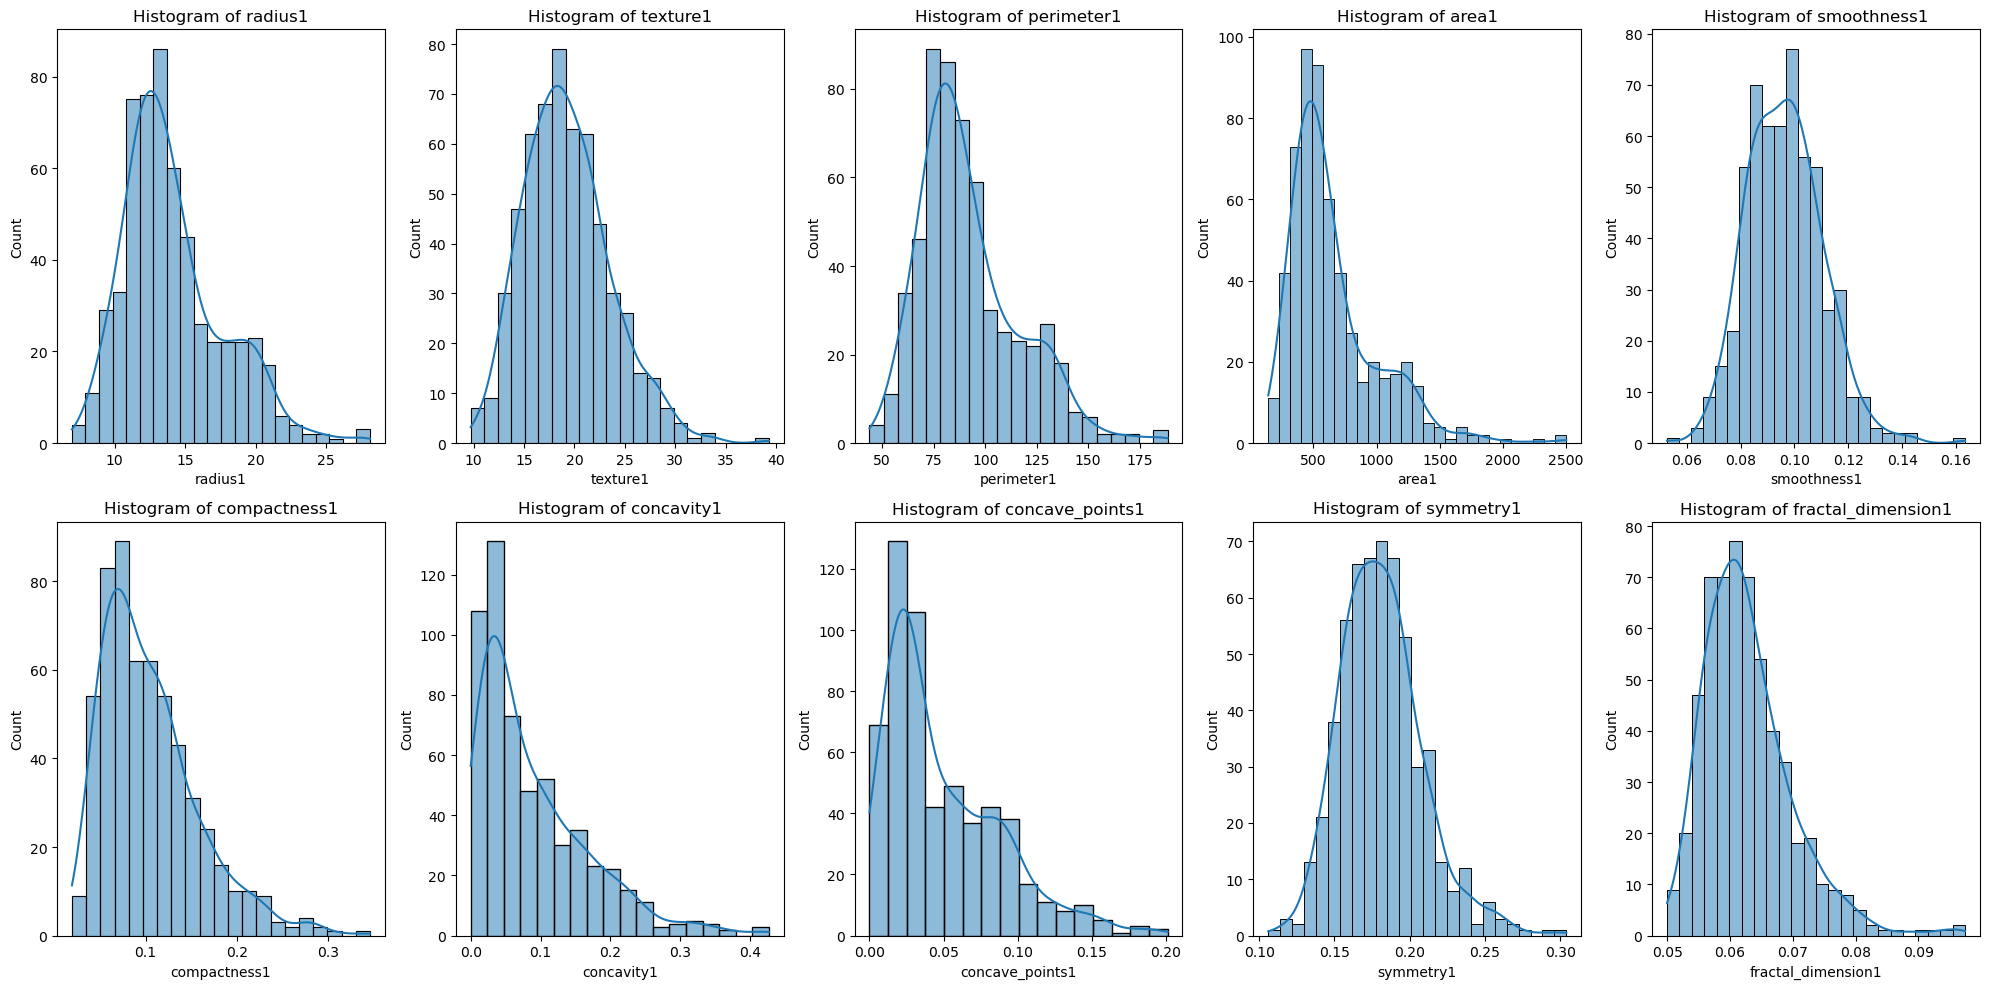

In [8]:
# Visualizing the distribution of the first 10 columns


# Slicing out the first 10 columns
features = df.iloc[:, :10]


# setting fiquresize
plt.figure(figsize=(20, 10))

# 1. Histogram for each numerical feature
for i, col in enumerate(features.columns, start=1):
    plt.subplot(2, 5, i)  # Adjust grid size for 10 plots
    sns.histplot(features[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

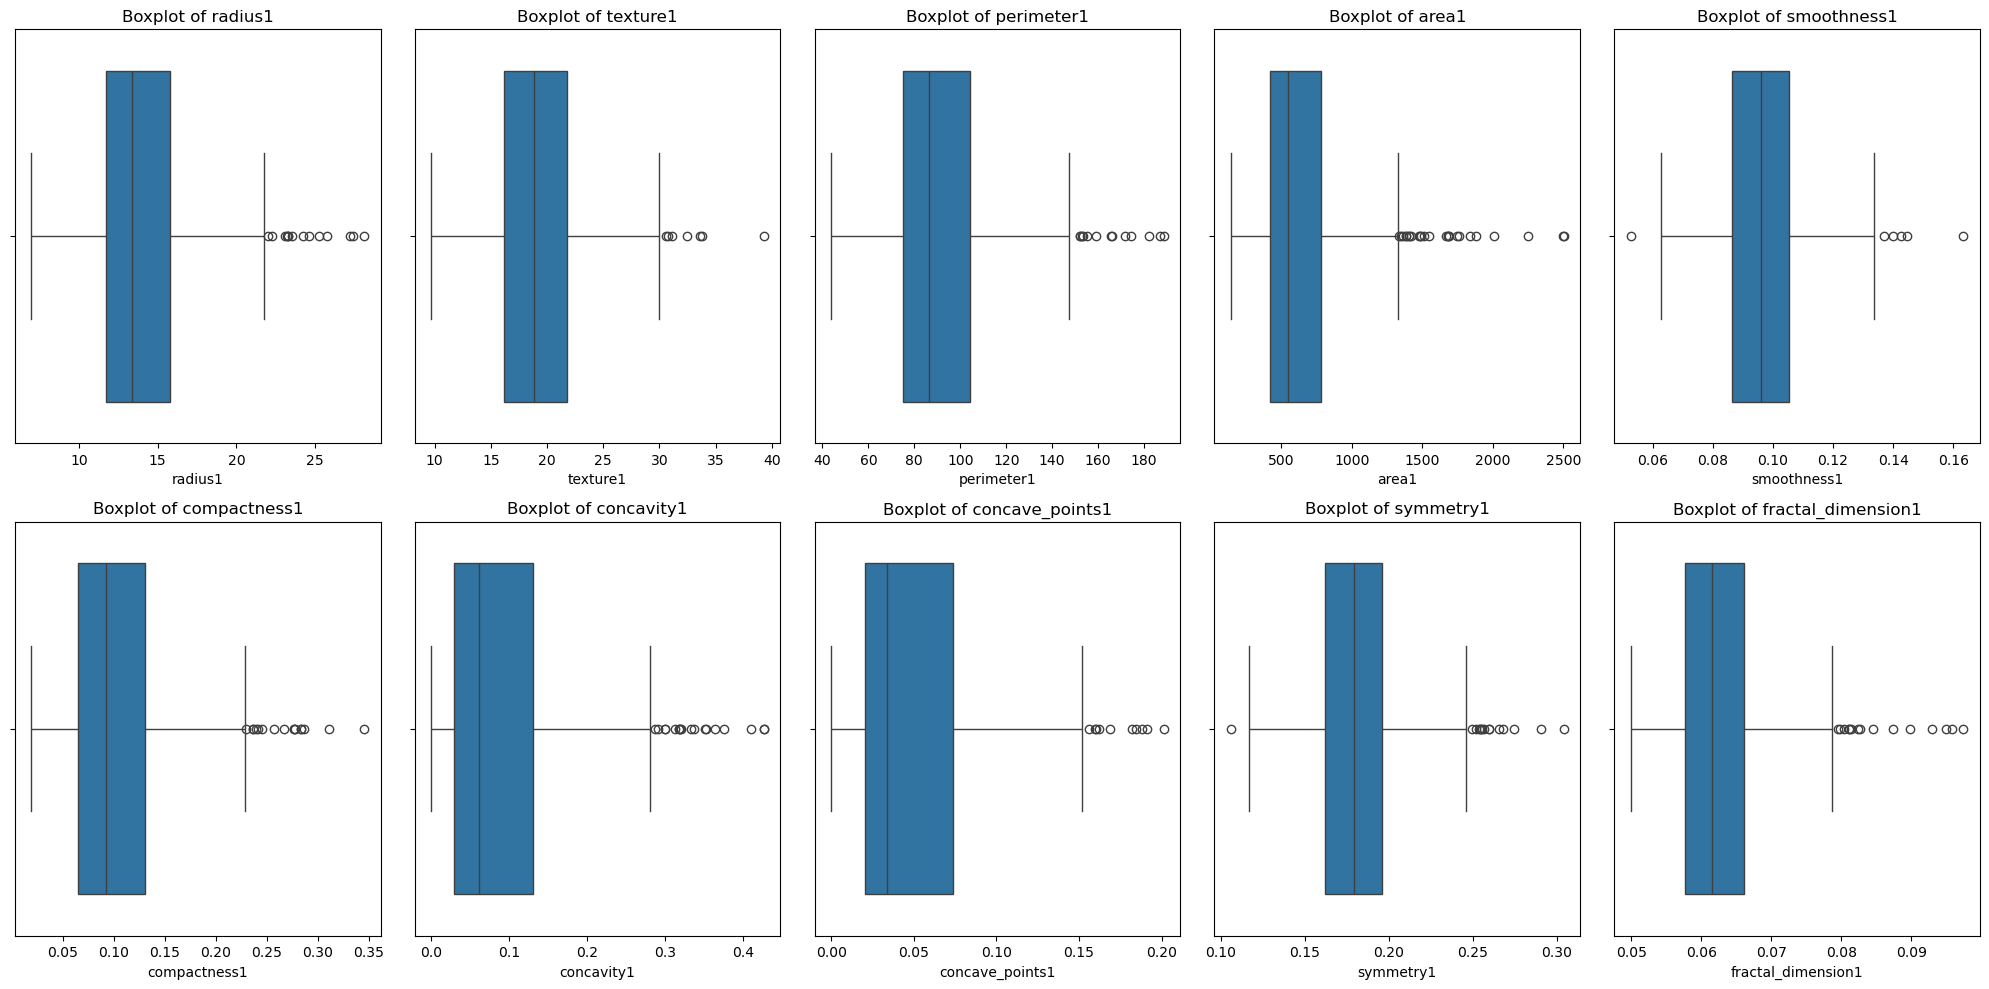

In [9]:
# 2. Boxplot for first 10 feature

plt.figure(figsize=(20, 10))
for i, col in enumerate(features.columns, start=1):
    plt.subplot(2, 5, i)  # Adjust grid size for 10 plots
    sns.boxplot(features[col], orient='h')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [10]:
# Visualizing Relationships among some features

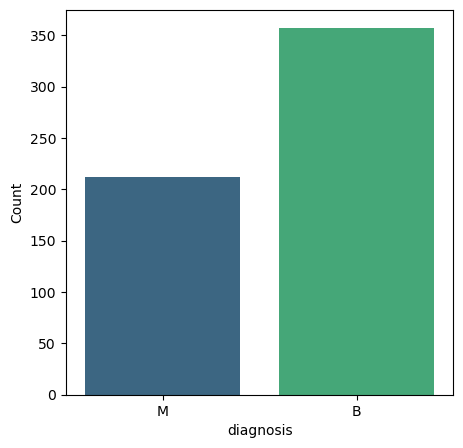

In [11]:

plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='diagnosis', palette='viridis')

# Adding title and labels

plt.xlabel('diagnosis')
plt.ylabel('Count')

# Display the plot
plt.show()


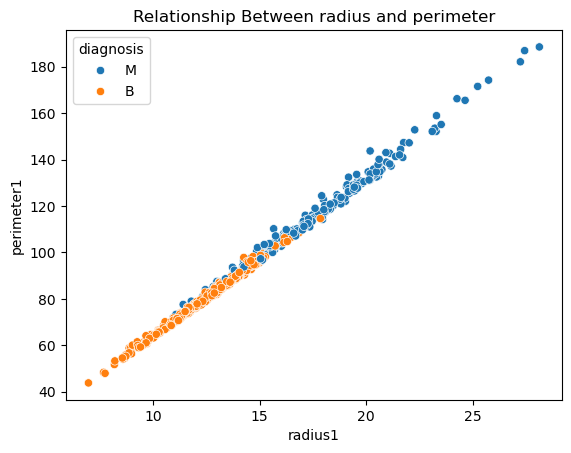

In [12]:
sns.scatterplot(data = df, x='radius1', y='perimeter1', hue='diagnosis')
plt.title('Relationship Between radius and perimeter', fontsize=12)
plt.show()

This scatterplot shows a strong linear relationship between "radius1" and "perimeter1," with data points color-coded by diagnosis: "M" (Malignant) in blue and "B" (Benign) in orange. Malignant cases generally have larger values for both features, indicating these attributes may be useful for classification.

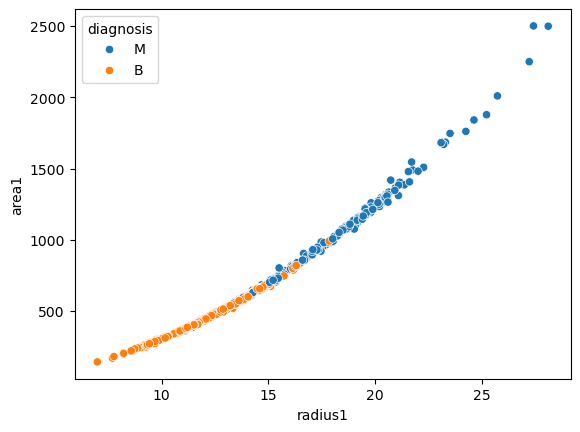

In [13]:
sns.scatterplot(data = df, x='radius1', y='area1', hue='diagnosis')
plt.show()

This plot shows the relationship between the radius1 and area1 features, categorized by the Diagnosis variable (M for malignant and B for benign). It suggests a positive correlation between radius1 and area1, with clear separation between the two diagnostic groups. The malignant cases (blue) generally occupy a higher range, while benign cases (orange) are clustered lower

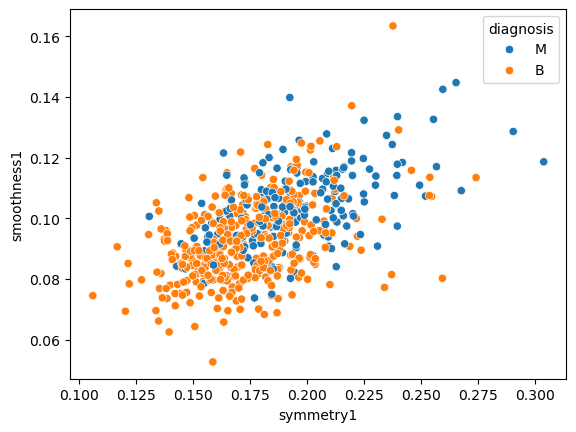

In [14]:
sns.scatterplot(data = df, x='symmetry1', y='smoothness1', hue='diagnosis')
plt.show()

The scatterplot shows the relationship between "symmetry1" and "smoothness1," differentiated by the diagnosis categories "M" (Malignant) and "B" (Benign). Malignant cases (blue) and benign cases (orange) exhibit overlapping distributions but with some separability.

In [15]:
# Checking features correlation
corr = df.corr()
corr

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


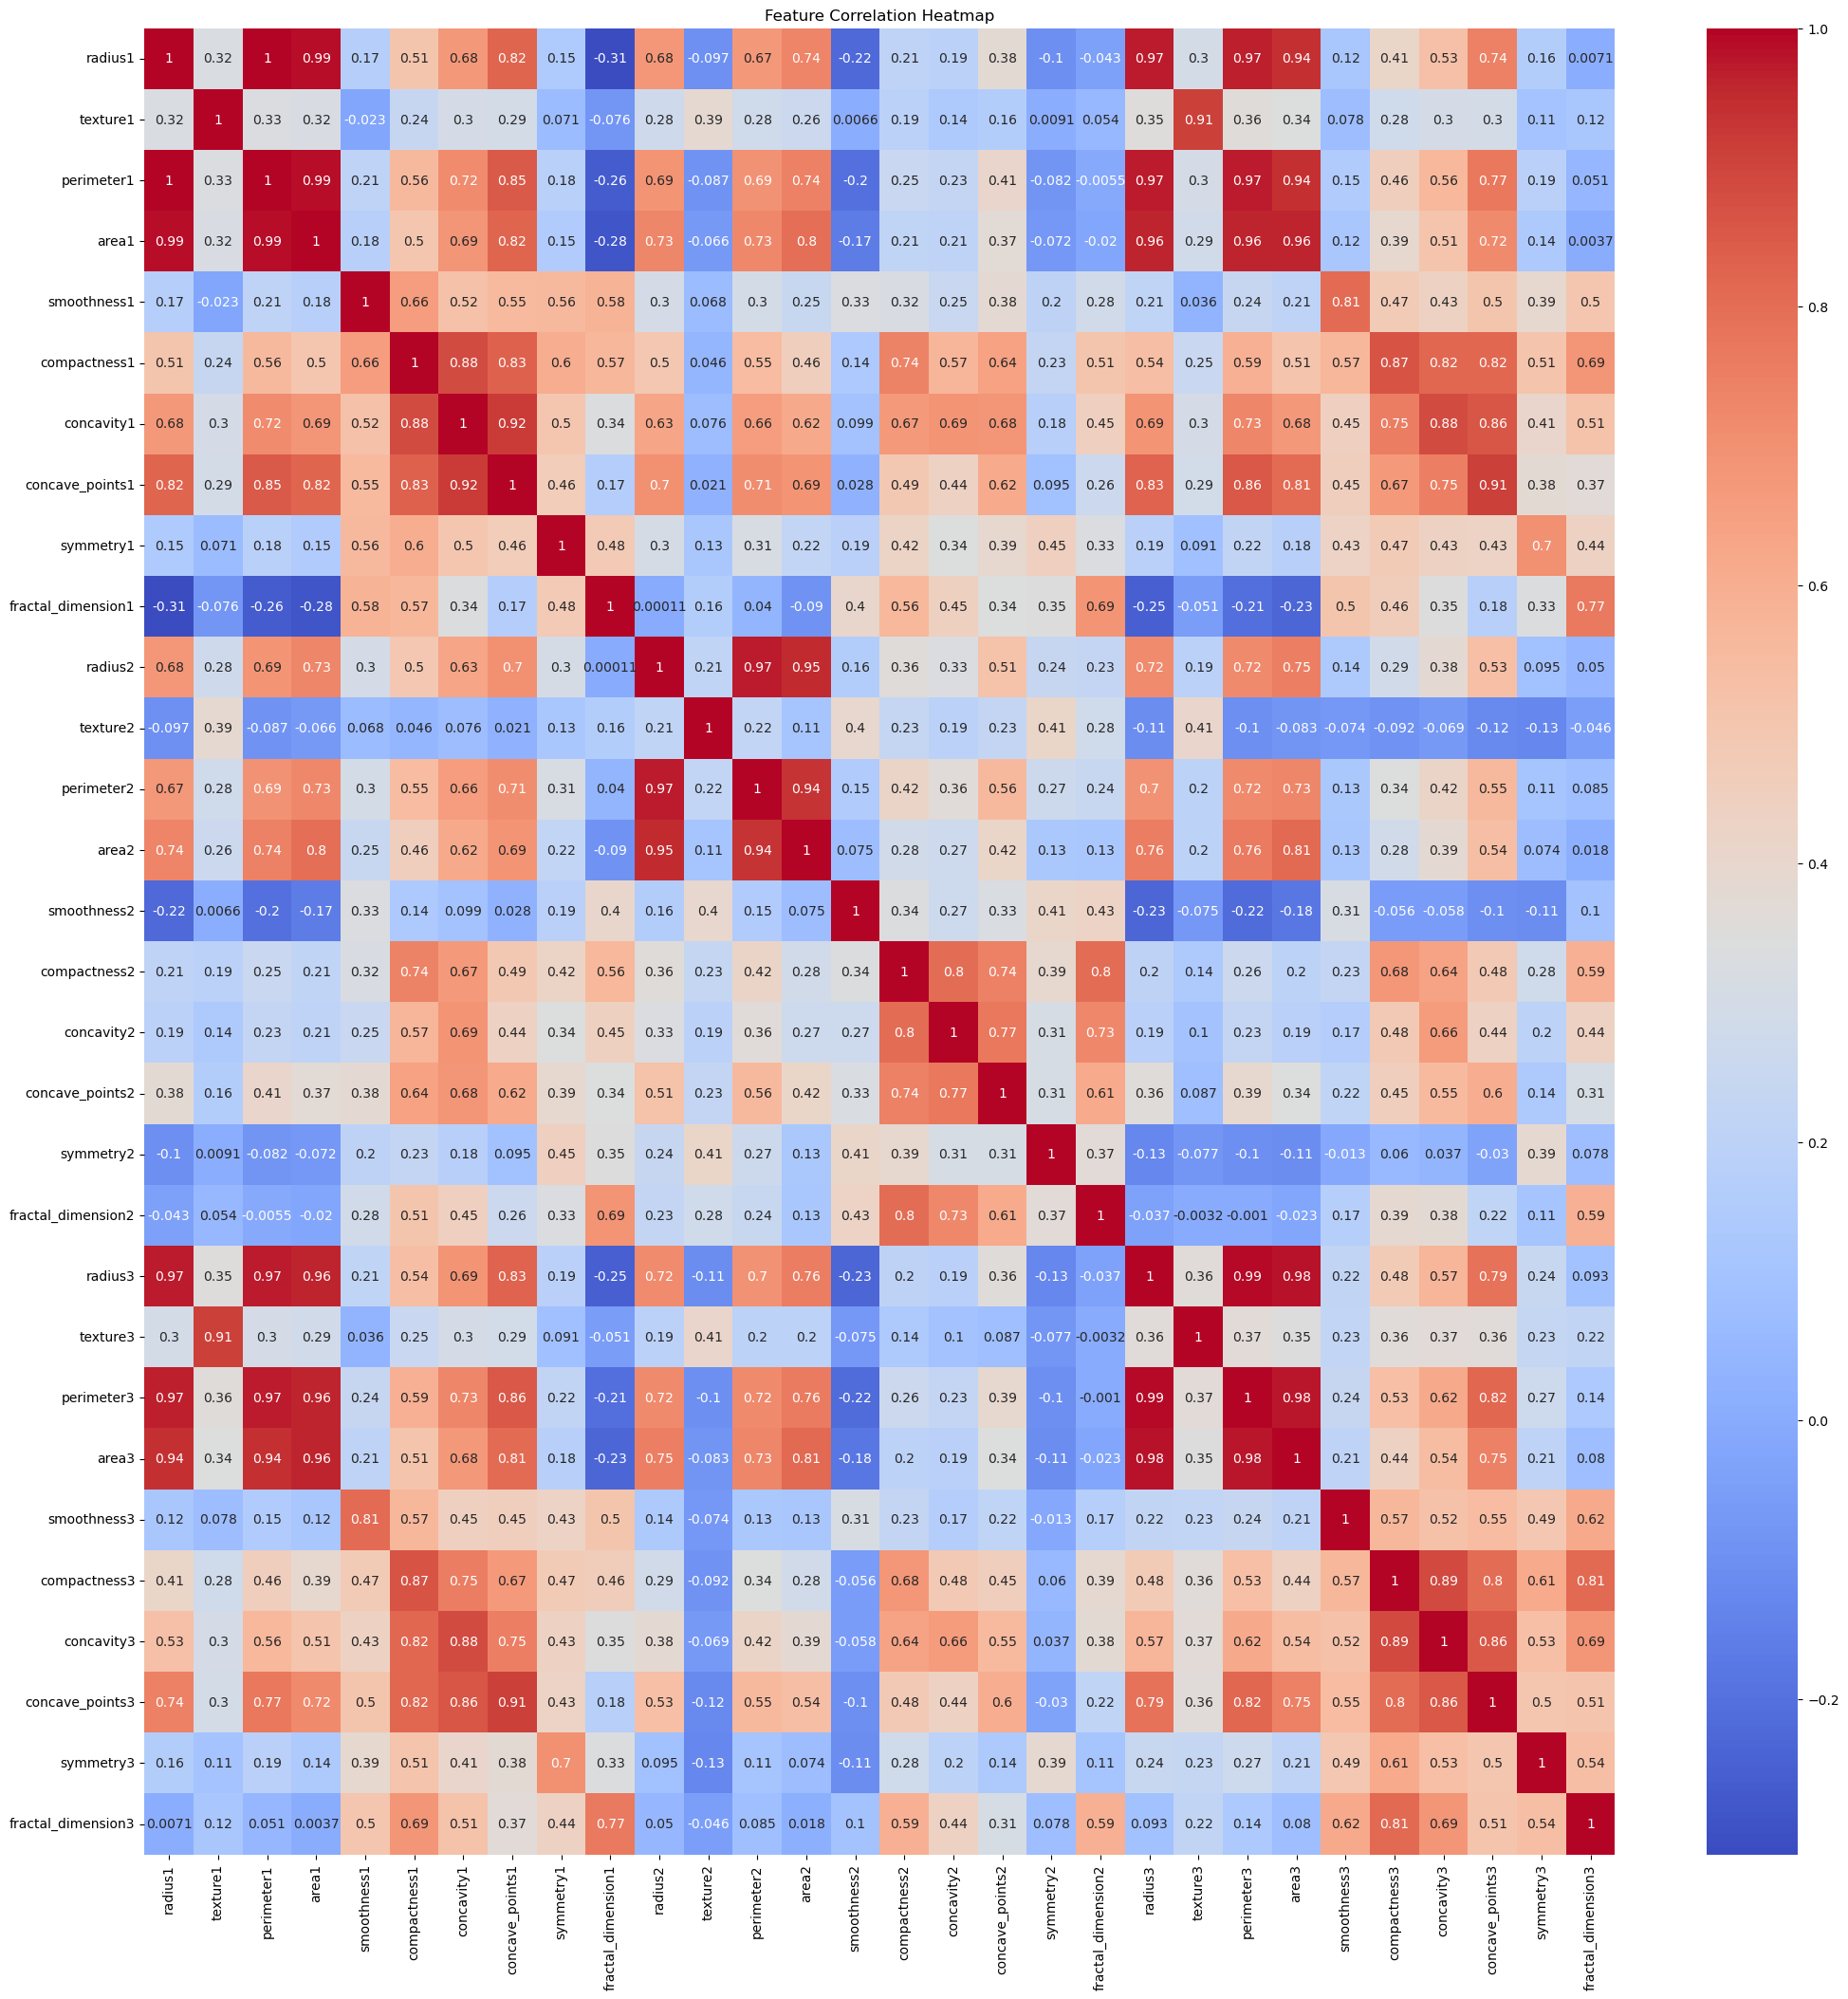

In [16]:
# Correlation heatmap
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# FEATURE ENGINEERING

In [17]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [18]:
df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)

In [19]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [20]:
df['diagnosis'] = df['diagnosis'].astype(float)

# FEATURE SELECTION

In [21]:

# Feature importance using Random Forest
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
rf = RandomForestClassifier()
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
print('feature importance by randomforest')
print(importances.sort_values(ascending=False))

feature importance by randomforest
perimeter3            0.168190
area3                 0.144358
concave_points1       0.120511
concave_points3       0.097204
perimeter1            0.060582
radius3               0.052714
concavity3            0.048049
area1                 0.047519
area2                 0.040706
concavity1            0.034269
radius1               0.026633
texture3              0.022720
compactness3          0.013863
perimeter2            0.013740
texture1              0.013522
smoothness3           0.012041
radius2               0.011152
symmetry3             0.009783
compactness1          0.009554
smoothness1           0.008401
concave_points2       0.006577
fractal_dimension3    0.005938
texture2              0.005144
compactness2          0.004212
smoothness2           0.004097
concavity2            0.004004
symmetry2             0.003871
symmetry1             0.003851
fractal_dimension1    0.003681
fractal_dimension2    0.003113
dtype: float64


In [22]:

# Mutual information
mi = mutual_info_classif(X, y)
mi_scores = pd.Series(mi, index=X.columns)
print('mutual info')
print(mi_scores.sort_values(ascending=False))

mutual info
perimeter3            0.475921
area3                 0.463845
radius3               0.452812
concave_points1       0.439978
concave_points3       0.438408
perimeter1            0.403374
concavity1            0.372840
radius1               0.368746
area1                 0.360006
area2                 0.341347
concavity3            0.316688
perimeter2            0.275162
radius2               0.248115
compactness3          0.225069
compactness1          0.214185
concave_points2       0.129168
texture3              0.123005
concavity2            0.117389
smoothness3           0.106708
texture1              0.095593
symmetry3             0.091765
smoothness1           0.079882
compactness2          0.074836
fractal_dimension3    0.066787
symmetry1             0.059511
fractal_dimension2    0.038998
smoothness2           0.016305
symmetry2             0.012073
fractal_dimension1    0.008127
texture2              0.001278
dtype: float64


In [23]:
# Retaining important features

importance_threshold = 0.02
mi_scores_threshold = 0.2

high_importance_features = set(
    importances[importances > importance_threshold ].index
)
high_mi_features = set(
    mi_scores[mi_scores > mi_scores_threshold ].index
)
selected_features = list(high_importance_features & high_mi_features)


In [24]:
df = df[selected_features + ['diagnosis']]

In [25]:
df.head()

,area1,perimeter3,concavity3,area3,perimeter1,concave_points1,radius1,radius3,concave_points3,concavity1,area2,diagnosis
0,1001.0,184.60,0.7119,2019.0,122.80,0.14710,17.99,25.38,0.2654,0.3001,153.40,1.0
1,1326.0,158.80,0.2416,1956.0,132.90,0.07017,20.57,24.99,0.1860,0.0869,74.08,1.0
2,1203.0,152.50,0.4504,1709.0,130.00,0.12790,19.69,23.57,0.2430,0.1974,94.03,1.0
3,386.1,98.87,0.6869,567.7,77.58,0.10520,11.42,14.91,0.2575,0.2414,27.23,1.0
4,1297.0,152.20,0.4000,1575.0,135.10,0.10430,20.29,22.54,0.1625,0.1980,94.44,1.0


In [26]:
df.shape

(569, 12)

In [27]:
"""We have to split the dataset to prevent data leakages when carrying out Encoding and Scaling"""

# Splitting the data into training and testing datasets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

In [28]:
train_df.head()

,area1,perimeter3,concavity3,area3,perimeter1,concave_points1,radius1,radius3,concave_points3,concavity1,area2,diagnosis
10,797.8,123.80,0.1459,1150.0,102.70,0.03323,16.02,19.19,0.09975,0.03299,40.51,1.0
170,464.1,86.97,0.1242,549.1,78.85,0.03700,12.32,13.50,0.09391,0.03987,17.43,0.0
407,514.5,91.63,0.1838,645.8,82.63,0.01867,12.85,14.40,0.05601,0.06126,41.24,0.0
430,685.0,125.40,0.9019,832.7,102.10,0.09711,14.90,16.35,0.24750,0.27330,24.19,1.0
27,1094.0,139.90,0.3446,1403.0,122.10,0.07731,18.61,21.31,0.14900,0.14900,93.54,1.0


In [29]:
test_df.head()

,area1,perimeter3,concavity3,area3,perimeter1,concave_points1,radius1,radius3,concave_points3,concavity1,area2,diagnosis
120,403.3,83.74,0.21020,510.5,73.34,0.02623,11.41,12.82,0.08958,0.03512,10.50,0.0
250,1364.0,165.30,0.69910,2010.0,138.90,0.13100,20.94,25.58,0.21050,0.27120,137.90,1.0
375,788.5,113.10,0.21140,861.5,106.30,0.05397,16.17,16.97,0.12510,0.06651,14.91,0.0
99,642.5,109.50,0.31940,826.4,94.48,0.05839,14.42,16.33,0.15650,0.09388,26.85,1.0
455,557.2,96.69,0.07003,705.6,86.34,0.03264,13.38,15.05,0.07763,0.02819,28.93,0.0


In [30]:
# Separating features (X) and target (y) for training
X_train = train_df.drop(columns='diagnosis')
y_train = train_df['diagnosis']

# Separating features (X) and target (y) for testing
X_test = test_df.drop(columns='diagnosis')
y_test = test_df['diagnosis']

In [31]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [32]:
# HANDLING IMBALANCED DATA

In [33]:
# target (Diagnosis) distribution

train_df.diagnosis.value_counts()

0.0    285
1.0    170
Name: diagnosis, dtype: int64

In [34]:
# Balancing the Training set with SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the class distribution after balancing
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0.0: 285, 1.0: 170})
Class distribution after SMOTE: Counter({1.0: 285, 0.0: 285})


In [35]:
balanced_df = pd.DataFrame(X_train_balanced, columns=train_df.drop(columns='diagnosis').columns)
balanced_df['diagnosis'] = y_train_balanced

In [36]:
balanced_df.diagnosis.value_counts()

1.0    285
0.0    285
Name: diagnosis, dtype: int64

In [37]:
# The training data has is now balanced

## Initializing and training the model

In [38]:
# Initializing model
logistic=LogisticRegression()

logistic.fit(X_train_balanced, y_train_balanced)
y_pred=logistic.predict(X_test)

0.9736842105263158
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        72
         1.0       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[70  2]
 [ 1 41]]


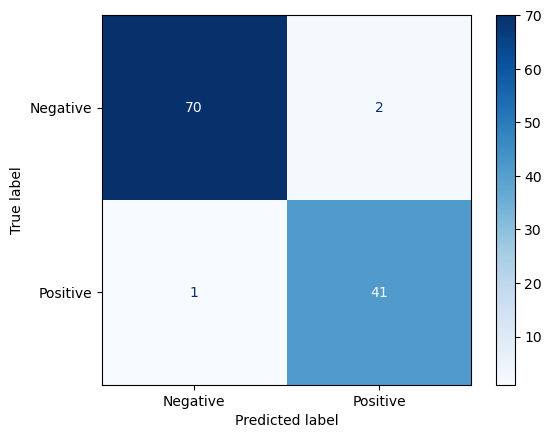

In [39]:
# Evaluation Metrics

cm = confusion_matrix(y_test, y_pred)
score=accuracy_score(y_test, y_pred)
print(score)
print(classification_report(y_test, y_pred))
print(cm)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.show()

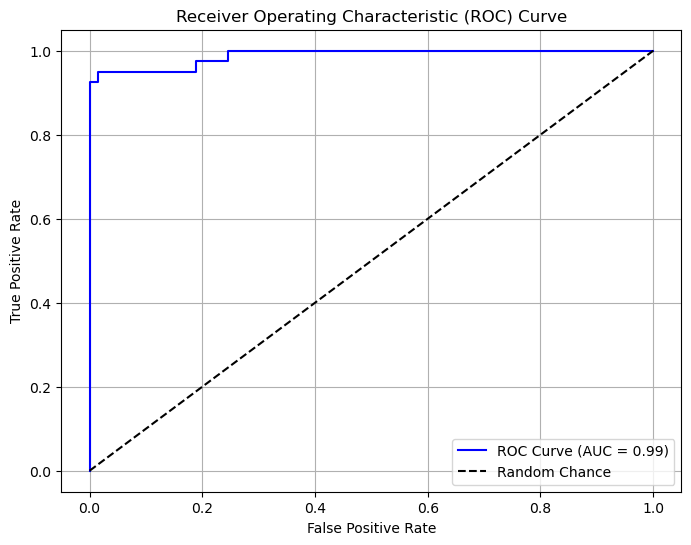

In [61]:
# ROC Curve

# Predicted probabilities
y_probs = randomcv.best_estimator_.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


The **ROC (Receiver Operating Characteristic) Curve** evaluates the performance of a binary classification model by plotting:

- **X-axis (False Positive Rate)**: The proportion of negatives incorrectly classified as positives.  
- **Y-axis (True Positive Rate)**: The proportion of positives correctly classified.

### Key Observations:
1. **Blue Curve**: Represents the model's performance.  
   - The closer it is to the top-left corner, the better the model distinguishes between classes.
2. **Dashed Line**: Represents random chance (AUC = 0.5). The ROC analysis reveals that the model performs better than random guessing as the curve is substantially above the dashline.
3. **AUC (Area Under Curve) = 0.99**: Indicates excellent model performance, as it’s very close to 1.0, suggesting high true positive rates with low false positives.  

### Summary:
The model is highly effective in classification with minimal misclassifications.

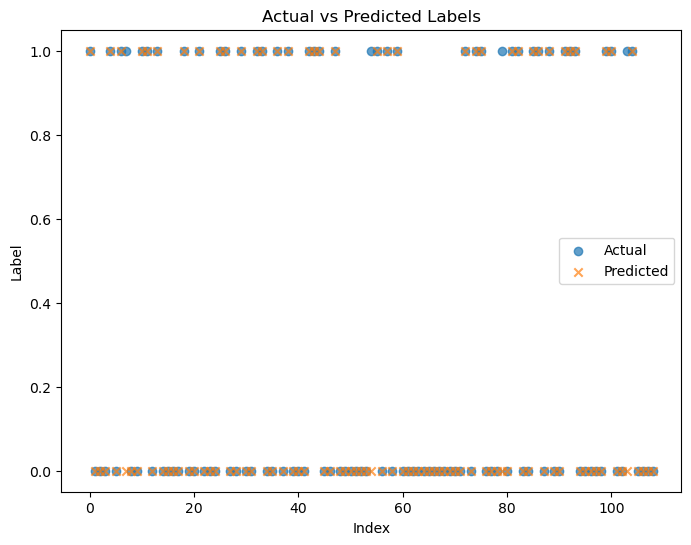

In [62]:
# Creating a DataFrame of actual vs predicted
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': randomcv.best_estimator_.predict(X_test)
}).reset_index(drop=True)

# Plotting comparison
plt.figure(figsize=(8, 6))
plt.scatter(actual_vs_predicted.index, actual_vs_predicted['Actual'], label="Actual", alpha=0.7)
plt.scatter(actual_vs_predicted.index, actual_vs_predicted['Predicted'], label="Predicted", alpha=0.7, marker='x')
plt.title("Actual vs Predicted Labels")
plt.xlabel("Index")
plt.ylabel("Label")
plt.legend()
plt.show()


The plot compares the **actual labels** (blue dots) with the **predicted labels** (orange crosses) for a binary classification problem.

- The **X-axis (Index)** represents the index of data points in the test dataset.
- The **Y-axis (Label)** represents the binary classes: `0` and `1`.
- **Overlap of Points**: The blue dots and orange crosses overlap closely, indicating the model's predictions align well with the actual labels for most data points.
- **Misclassifications**: The orange crosses that don't overlap with blue dots represent incorrect predictions. Though there appear to be very few of these, indicating good model performance.

The plot visually confirms that the model predicts accurately in most cases.

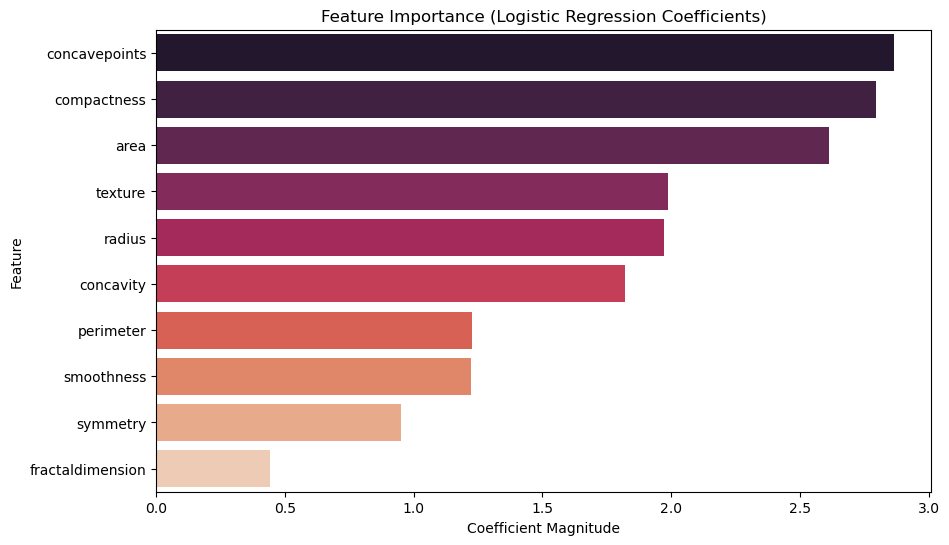

In [63]:
#  Getting the Features names
features = train_df.drop(columns='Diagnosis').columns.tolist()

# Coefficients
coefficients = randomcv.best_estimator_.coef_.flatten()

# Sortting by importance
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values('Abs_Coefficient', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data = importance_df, x='Abs_Coefficient', y = 'Feature', palette='rocket')
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance (Logistic Regression Coefficients)")
# plt.gca().invert_yaxis()
plt.show()




This bar chart displays the feature importance based on the absolute values of logistic regression coefficients. Features like "concavepoints," "compactness," and "area" are the most influential in predicting the target variable, while "fractal dimension" has the least impact.

**Future Research Directions**   
     - Explore advanced models (e.g., Random Forest, XGBoost).  
     - Perform feature selection to reduce redundancy.  
     - Tune hyperparameters to optimize model performance further. 
     - Incorporate additional datasets to improve generalizability.  
     - Develop a pipeline for real-time diagnosis in clinical settings.  
     - Explore deep learning methods for feature extraction and classification.

Please give your suggestion

Please upvote if you like this notebook

Metrics for Logistic Regression:
Accuracy: 0.97
Precision: 0.95
Recall: 0.98
F1 Score: 0.96


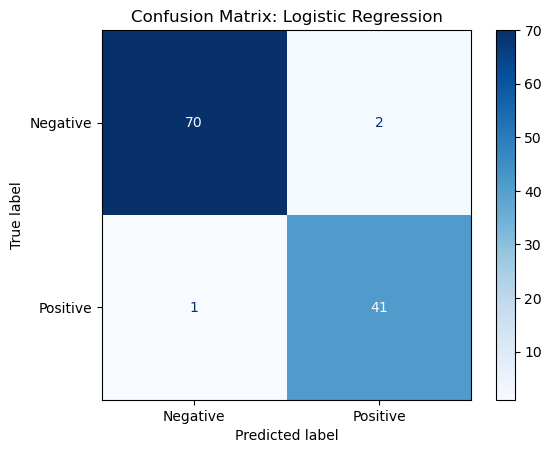

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report
)
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Step 2: Train, Predict, and Evaluate
evaluation_results = {}

for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Save results
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
    }


# Step 4: Define a Function to Display Metrics for a Model
def display_metrics(model_name):
    if model_name not in evaluation_results:
        print(f"Model '{model_name}' not found.")
        return
    
    metrics = evaluation_results[model_name]
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precision: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print(f"F1 Score: {metrics['f1']:.2f}")
    
    # Display confusion matrix
    cm = metrics['confusion_matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Example: Call display_metrics for Logistic Regression
display_metrics("Logistic Regression")


Metrics for SVM:
Accuracy: 0.97
Precision: 1.00
Recall: 0.93
F1 Score: 0.96


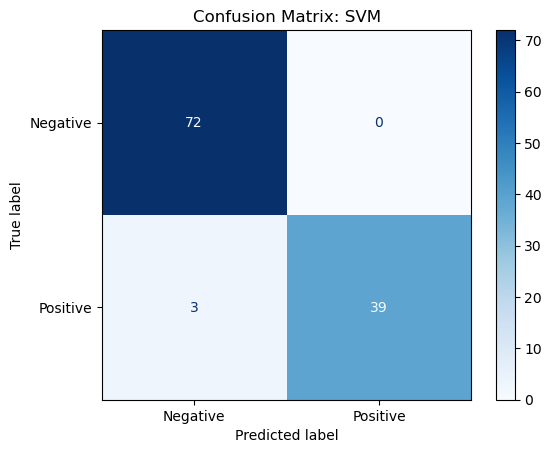

In [48]:
display_metrics("SVM")

Metrics for Random Forest:
Accuracy: 0.96
Precision: 0.97
Recall: 0.93
F1 Score: 0.95


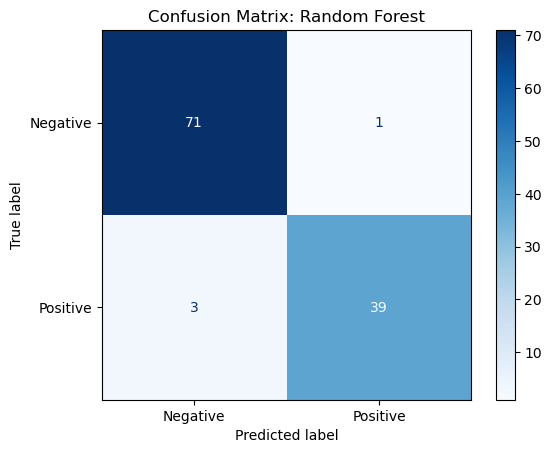

In [49]:
display_metrics("Random Forest")

Metrics for Decision Tree:
Accuracy: 0.95
Precision: 0.95
Recall: 0.90
F1 Score: 0.93


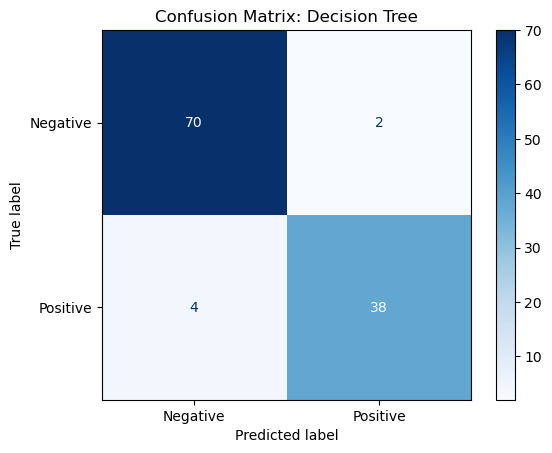

In [50]:
display_metrics("Decision Tree")

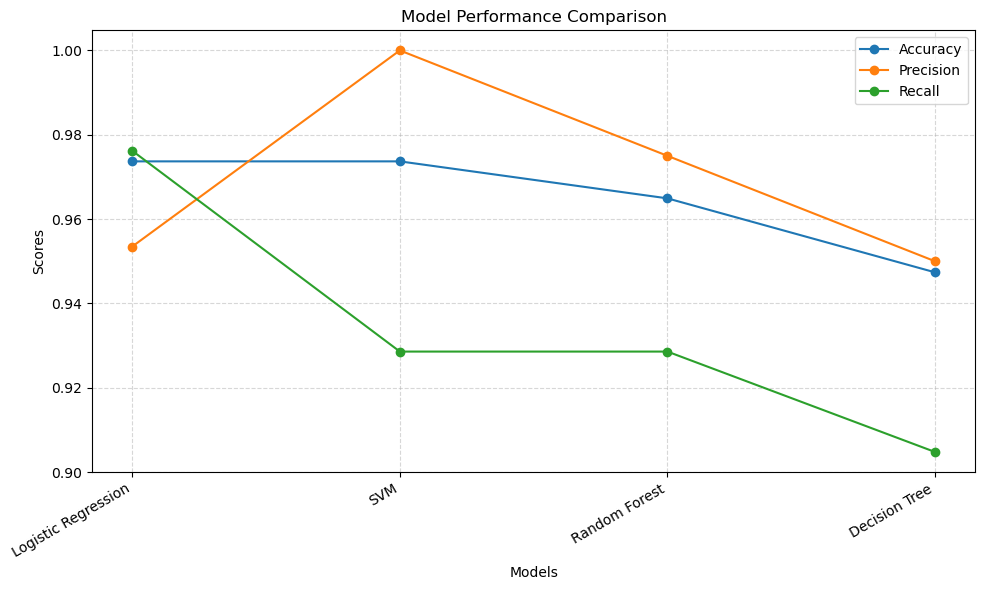

In [51]:


# Metric names and values
metric_names = ["accuracy", "precision", "recall"]
metric_values = {metric: [evaluation_results[m][metric] for m in models] for metric in metric_names}

# Define X-axis positions and model names
x = np.arange(len(models))
model_names = list(models.keys())

# Plotting the metrics as line plots
fig, ax = plt.subplots(figsize=(10, 6))

for metric in metric_names:
    ax.plot(
        x, 
        metric_values[metric], 
        marker='o', 
        label=metric.capitalize(),
        linestyle='-',  # Line style for connecting the points
    )

# Formatting the plot
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=30, ha='right')
ax.set_ylabel("Scores")
ax.set_xlabel("Models")
ax.set_title("Model Performance Comparison")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


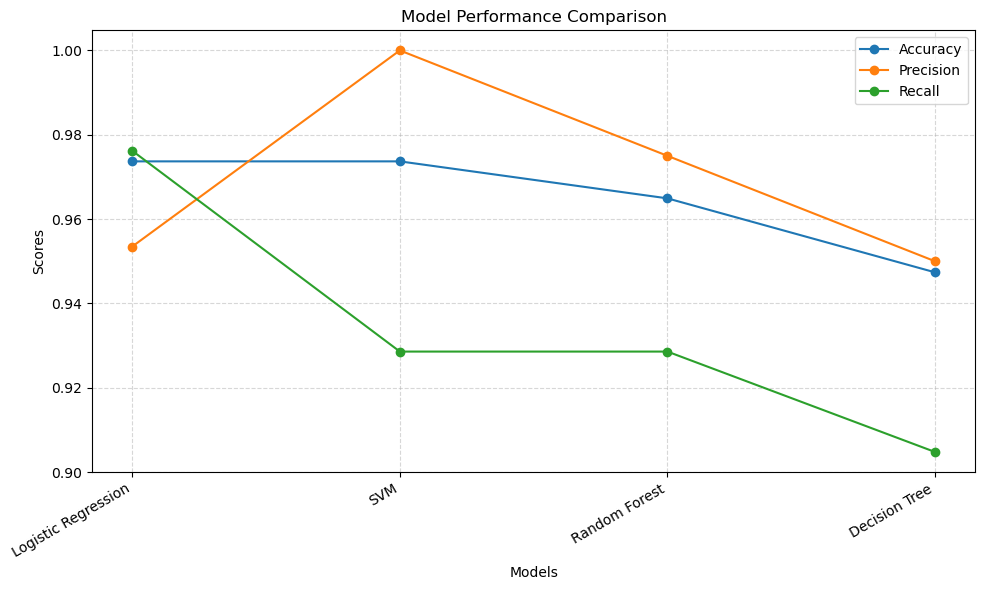

In [52]:
# Metric names and values
metric_names = ["accuracy", "precision", "recall"]
metric_values = {metric: [evaluation_results[m][metric] for m in models] for metric in metric_names}

# Define X-axis positions and model names
x = np.arange(len(models))
model_names = list(models.keys())

# Plotting the metrics as line plots
fig, ax = plt.subplots(figsize=(10, 6))

for metric in metric_names:
    ax.plot(
        x, 
        metric_values[metric], 
        marker='o', 
        label=metric.capitalize(),
        linestyle='-',  # Line style for connecting the points
    )

# Formatting the plot
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=30, ha='right')
ax.set_ylabel("Scores")
ax.set_xlabel("Models")
ax.set_title("Model Performance Comparison")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()
